# Using Grayscale Images Without Meta Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder

# Loading Dataset
df = pd.read_csv("hmnist_8_8_L.csv")
meta_data = pd.read_csv("HAM10000_metadata.csv")

# Converting categorical values to numerical values


# Getting Labels
all_labels = meta_data['dx']
labels = meta_data['dx'].isin(['bcc', 'mel', 'akiec'])
meta_attributes = meta_data[["dx_type", "age", "sex", "localization"]]

categorical_columns = meta_attributes.select_dtypes(include=['object']).columns
label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    meta_attributes[col] = le.fit_transform(meta_attributes[col])
    label_encoders[col] = le

print(f"{meta_attributes=}")
image_name = meta_data['image_id']

df_without_label = df.drop(columns=['label'])
# print(f"{df_without_label=}")
df_with_meta = pd.concat([df_without_label, meta_attributes], axis=1)
print(f"{df_with_meta=}")
pixel_columns = df_without_label.columns

cancer_count = sum(labels == True)
noncancer_count = sum(labels == False)
print("Cancer Instances:", cancer_count)
print("Non-Cancer Instances:", noncancer_count)
# df


meta_attributes=       dx_type   age  sex  localization
0            3  80.0    1            11
1            3  80.0    1            11
2            3  80.0    1            11
3            3  80.0    1            11
4            3  75.0    1             4
...        ...   ...  ...           ...
10010        3  40.0    1             0
10011        3  40.0    1             0
10012        3  40.0    1             0
10013        3  80.0    1             5
10014        3  70.0    0             2

[10015 rows x 4 columns]
df_with_meta=       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            172        182        191        183        180        181   
1             98        149        170        193        183        162   
2            165        164        179        172        152        163   
3            109        159        167        166        163        159   
4            173        202        210        194        208        248   
...          ..

C:\Users\Santosh\AppData\Local\Temp\ipykernel_2720\1515756450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = le.fit_transform(meta_attributes[col])
C:\Users\Santosh\AppData\Local\Temp\ipykernel_2720\1515756450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_attributes[col] = le.fit_transform(meta_attributes[col])
C:\Users\Santosh\AppData\Local\Temp\ipykernel_2720\1515756450.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

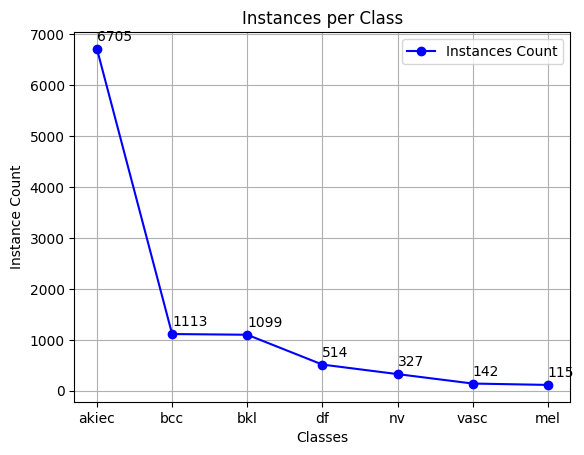

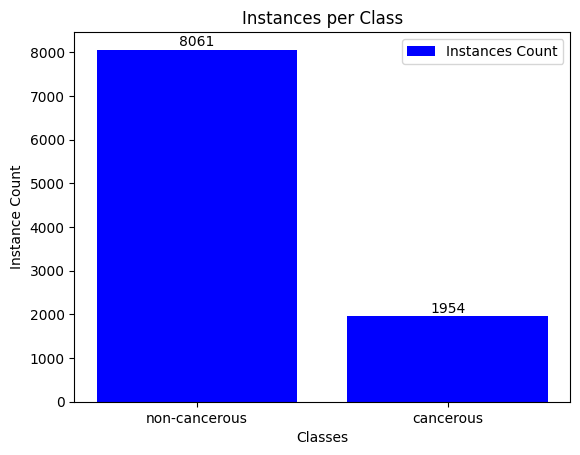

In [9]:
unique_classes_count = all_labels.value_counts()
unique_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']
plt.plot(unique_classes,
         unique_classes_count, marker='o', linestyle='-', color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+100, f'{y_coord}', ha='left', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(True)
plt.show()

unique_classes_count = [noncancer_count, cancer_count]
unique_classes = ['non-cancerous', 'cancerous']
plt.bar(unique_classes,
        [noncancer_count, cancer_count], color='b', label='Instances Count')

for x_coord, y_coord in zip(unique_classes, unique_classes_count):
    plt.text(x_coord, y_coord+20, f'{y_coord}', ha='center', va='bottom')

plt.xlabel('Classes')
plt.ylabel('Instance Count')
plt.title('Instances per Class')
plt.legend()
plt.grid(False)
plt.show()

side_length=8
[9810 9647 9866  399 4155 2368 4887 1146 7162]


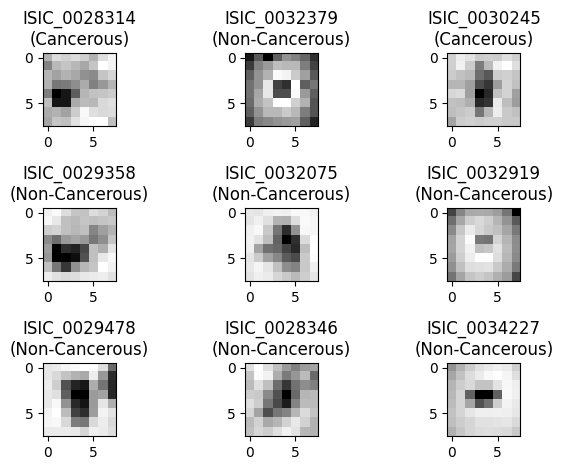

In [10]:
rows = 3
cols = 3
plotNo = 0

side_length = int((len(df_without_label.columns))**0.5)
print(f"{side_length=}")

def plotImage(index):
    global plotNo
    plt.subplot(rows, cols, plotNo+1)
    value = df_without_label[pixel_columns][index:index+1].values[0]

    # red_values = (value[0:2352:3]).reshape(28, 28)
    # green_values = value[1:2352:3].reshape(28, 28)
    # blue_values = value[2:2352:3].reshape(28, 28)
    # print(f"{blue_values[-1]=}")

    # rgb_image = np.stack([red_values, green_values, blue_values], axis=-1)

    plt.title(
        f"{image_name[index]}\n({'Cancerous' if labels[index] else 'Non-Cancerous'})")
    # plt.imshow(rgb_image)
    plt.imshow(value[:side_length*side_length].reshape(side_length, side_length), cmap="gray")
    plotNo += 1


stratified_splitter = StratifiedShuffleSplit(
    n_splits=1, test_size=9, random_state=56)

for train_index, test_index in stratified_splitter.split(df_without_label, labels):
    print(f"{test_index}")
    for index in test_index:
        plotImage(index)

plt.tight_layout()
plt.show()

In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = [], [], [], []

for train_index, test_index in StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=56).split(df_with_meta, labels):
    X_train, X_test, y_train, y_test = df_with_meta.iloc[
        train_index], df_with_meta.iloc[test_index], labels[train_index], labels[test_index]
# print(f"{train_index=}")
# print(f"{test_index=}")


def calc_Confusion_Matrix(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test, y_pred)


confusion_matrices = []
roc_auc_arr = []


In [12]:
confusion_matrices.append(calc_Confusion_Matrix(svm.SVC()))
display(confusion_matrices[0])


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
confusion_matrices.append(calc_Confusion_Matrix(RandomForestClassifier()))
display(confusion_matrices[1])


array([[1582,   30],
       [ 335,   56]], dtype=int64)

In [ ]:
confusion_matrices.append(calc_Confusion_Matrix(
    LogisticRegression(max_iter=3000)))
display(confusion_matrices[2])


array([[1583,   29],
       [ 366,   25]], dtype=int64)

In [ ]:
confusion_matrices.append(calc_Confusion_Matrix(XGBClassifier()))
display(confusion_matrices[3])


array([[1534,   78],
       [ 301,   90]], dtype=int64)

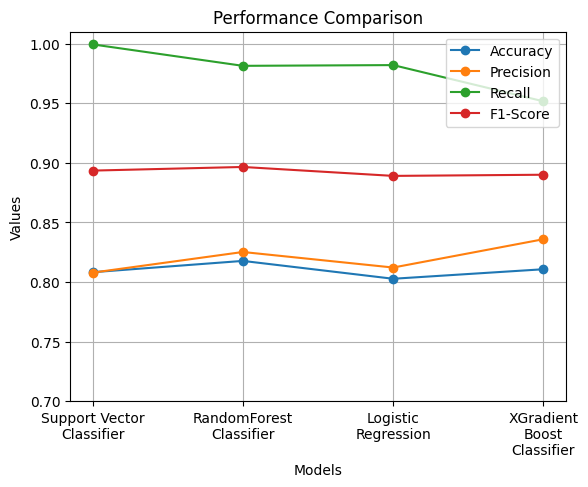

In [ ]:
accuracies = [(score[0][0]+score[1][1])/(score[0][0]+score[0]
                                         [1]+score[1][0]+score[1][1]) for score in confusion_matrices]
precisions = [score[0][0]/(score[0][0]+score[1][0])
              for score in confusion_matrices]
recalls = [score[0][0]/(score[0][0]+score[0][1])
           for score in confusion_matrices]
f1scores = [2*p*r/(p+r) for p, r in zip(precisions, recalls)]
models = ['Support Vector\nClassifier', 'RandomForest\nClassifier',
          'Logistic\nRegression', 'XGradient\nBoost\nClassifier']
plt.plot(models, accuracies, marker='o', linestyle='-', label="Accuracy")
# def plot_labels(models, accuracies):
#     for x_coord, y_coord in zip(models, accuracies):
#         plt.text(x_coord, y_coord, "%.2f" % y_coord, ha='left', va='bottom')
# plot_labels(models, accuracies)
plt.plot(models, precisions, marker='o', linestyle='-', label="Precision")
# plot_labels(models, precisions)
plt.plot(models, recalls, marker='o', linestyle='-', label="Recall")
# plot_labels(models, recalls)
plt.plot(models, f1scores, marker='o', linestyle='-', label="F1-Score")
# plot_labels(models, f1scores)
# plt.plot(models, auc_roc_scores, label ="AUC-ROC")
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Performance Comparison')
plt.legend(loc='upper right')
plt.ylim(0.7, 1.01)
plt.grid(True)
plt.show()
